# Prediction of teams that will reach the Playoffs

## Section: Imports and Datasets loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
! pip install tabulate
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

players = pd.read_csv('basketballPlayoffs/players.csv', delimiter=",")
coaches = pd.read_csv('basketballPlayoffs/coaches.csv', delimiter=",")
teams = pd.read_csv('basketballPlayoffs/teams.csv', delimiter=",")
players_teams = pd.read_csv('basketballPlayoffs/players_teams.csv', delimiter=",")
teams_post = pd.read_csv('basketballPlayoffs/teams_post.csv', delimiter=",")
series_post = pd.read_csv('basketballPlayoffs/series_post.csv', delimiter=",")
awards_players = pd.read_csv('basketballPlayoffs/awards_players.csv', delimiter=",")
awards_coaches = pd.read_csv('basketballPlayoffs/awards_coaches.csv', delimiter=",")

print(players.head())
print(coaches)
print(teams)
print(players_teams)
print(teams_post)
print(series_post)
print(awards_players)
print(awards_coaches)


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\hreis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     NaN  1981-05-24  0000-00-00  
        coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0    adamsmi01w     5  WAS  WNBA      0   17    17          1            2
1    adubari99w     1  NYL  WNBA      0   20 

## Section: Exploratory Data Analysis (EDA)

### Overview
This section focuses on explore each dataset to gain insights into the data. This step will help you understand the relationships between different features and the target variable. This process involves:

#### **Teams**:

1. **Checking for missing values**
2. **Counting unique values per column**
3. **Visualize distributions**
4. **Visualize correlations and patterns**: Create a correlation matrix, ``correlation_matrix``, to evaluate the relationship between variables and performing a chi-square test, ``chi_square``, to evaluate the independence between each categorical feature and a specified target variable.

#### **Players**:

1.  **Checking for missing values**
2.  **Counting unique values per column**
3.  **Compare players height**: Create a graphic where heights are measure in cm and divided: ``<160.0``, ``160.0-170.0``, ``170.0-180.0``, ``180.0-190.0``, ``190.0-200.0``, ``>200.0``
4.  **Visualize the number of players per position**: Create a graphic where we visualize the distribution of player position: ``G``, ``F``, ``C``, ``F-C``, ``G-F``, ``C-F``
5.  **Visualize players top colleges**
6.  **Visualize correlations and patterns**: Create a correlation matrix, ``correlation_matrix``, to evaluate the relationship between variables

#### **Teams Post Season**

1. **Checking for missing values**
2. **Visualize win-loss ratios**: Calculate win-loss ratios with ``Win`` and ``Loss`` values, then create a ``Bar Chart`` to visualize the results

#### **Series Post Season**

1. **Visualize data insigths**:
   - Teams that won in the playoffs each year
   - Teams that won and lost each year
   - Total appearances of each team in the finals

#### **Coaches**

1. **Checking for missing values**
2. **Extract the wins and losses data**: Create a ``Scater Plot`` to visualize wins and losses data about coaches

#### **Awards Players**
1. **Checking for missing values**

#### **Awards Coaches**
1. **Checking for missing values**

### Teams metrics

In [8]:
teams.head()

teams.isnull().sum()

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64

In [9]:
for column in teams.columns:
    unique_values = teams[column].unique()
    print(f"Number of different values in the {column} column are:", len(unique_values))
    print("------------")

Number of different values in the year column are: 10
------------
Number of different values in the lgID column are: 1
------------
Number of different values in the tmID column are: 20
------------
Number of different values in the franchID column are: 18
------------
Number of different values in the confID column are: 2
------------
Number of different values in the divID column are: 1
------------
Number of different values in the rank column are: 8
------------
Number of different values in the playoff column are: 2
------------
Number of different values in the seeded column are: 1
------------
Number of different values in the firstRound column are: 3
------------
Number of different values in the semis column are: 3
------------
Number of different values in the finals column are: 3
------------
Number of different values in the name column are: 20
------------
Number of different values in the o_fgm column are: 116
------------
Number of different values in the o_fga column a

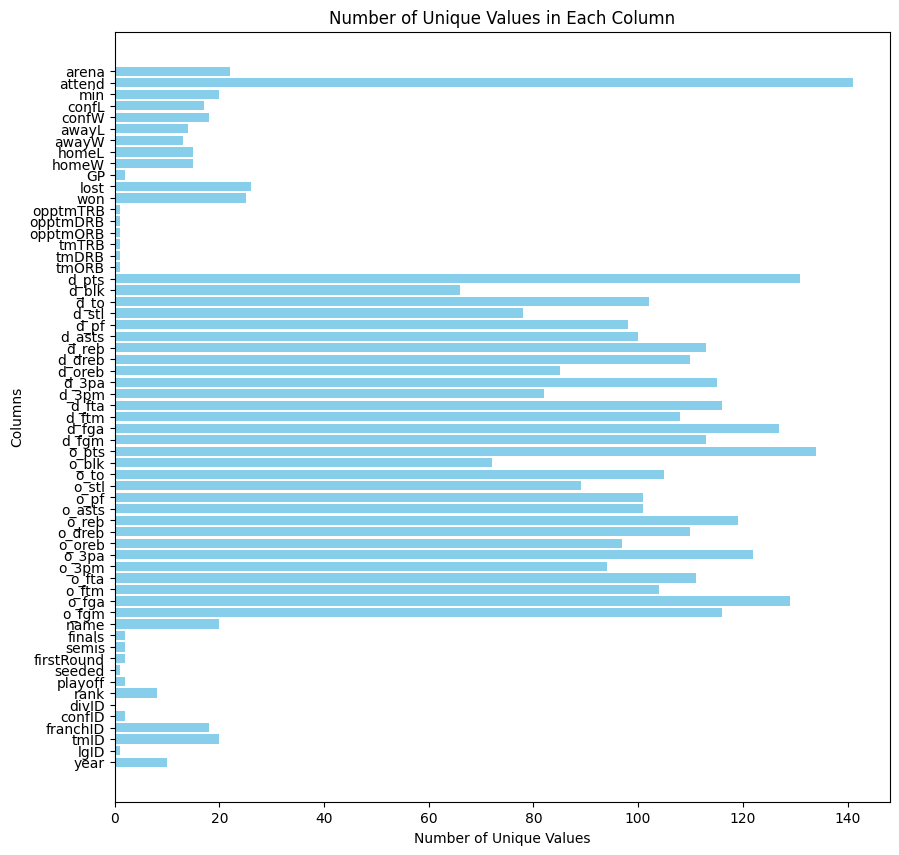

In [10]:
columns = []
value_counts = []

for column in teams.columns:
    unique_values = teams[column].nunique()
    columns.append(column)
    value_counts.append(unique_values)

plt.figure(figsize=(10, 10))
plt.barh(columns, value_counts, color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')
plt.show()

In [11]:
print(teams.dtypes)

year         int64
lgID        object
tmID        object
franchID    object
confID      object
             ...  
confW        int64
confL        int64
min          int64
attend       int64
arena       object
Length: 61, dtype: object


In [12]:
teams_numeric = teams.copy()

for column in teams_numeric.columns:
    if teams_numeric[column].dtype == 'object':
        teams_numeric[column] = teams_numeric[column].astype('category').cat.codes

teams_numeric.describe()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
count,142.000000,142.0,142.000000,142.000000,142.000000,0.0,142.000000,142.000000,142.0,142.00000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.302817,0.0,10.070423,9.415493,0.507042,NaN,4.084507,0.563380,0.0,-0.15493,...,33.323944,10.169014,6.492958,6.492958,10.169014,10.563380,10.563380,6735.683099,141050.253521,10.838028
std,2.917274,0.0,5.426031,4.906564,0.501720,NaN,2.095226,0.497722,0.0,0.83620,...,0.949425,2.994017,2.967308,2.702104,2.731409,3.485461,3.485461,197.851093,34714.358519,6.565153
min,1.000000,0.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.0,-1.00000,...,32.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,6400.000000,57635.000000,0.000000
25%,3.000000,0.0,6.000000,5.000000,0.000000,NaN,2.000000,0.000000,0.0,-1.00000,...,32.000000,8.000000,4.250000,5.000000,9.000000,8.000000,8.000000,6500.000000,120897.500000,6.000000
50%,5.000000,0.0,10.000000,10.000000,1.000000,NaN,4.000000,1.000000,0.0,0.00000,...,34.000000,11.000000,6.000000,6.000000,10.000000,11.000000,10.000000,6825.000000,135895.500000,10.000000
75%,8.000000,0.0,15.000000,14.000000,1.000000,NaN,6.000000,1.000000,0.0,1.00000,...,34.000000,12.000000,8.000000,8.000000,12.000000,13.000000,13.000000,6875.000000,150441.500000,16.000000
max,10.000000,0.0,19.000000,17.000000,1.000000,NaN,8.000000,1.000000,0.0,1.00000,...,34.000000,16.000000,16.000000,13.000000,16.000000,19.000000,19.000000,7025.000000,259237.000000,21.000000


In [13]:
def correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()

    target_correlation = corr_matrix['playoff']

    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

    dict = {}

    for feature, correlation in target_correlation.items():
        print(f"Correlation between target and {feature}: {correlation}")
        dict[feature] = correlation

    return dict

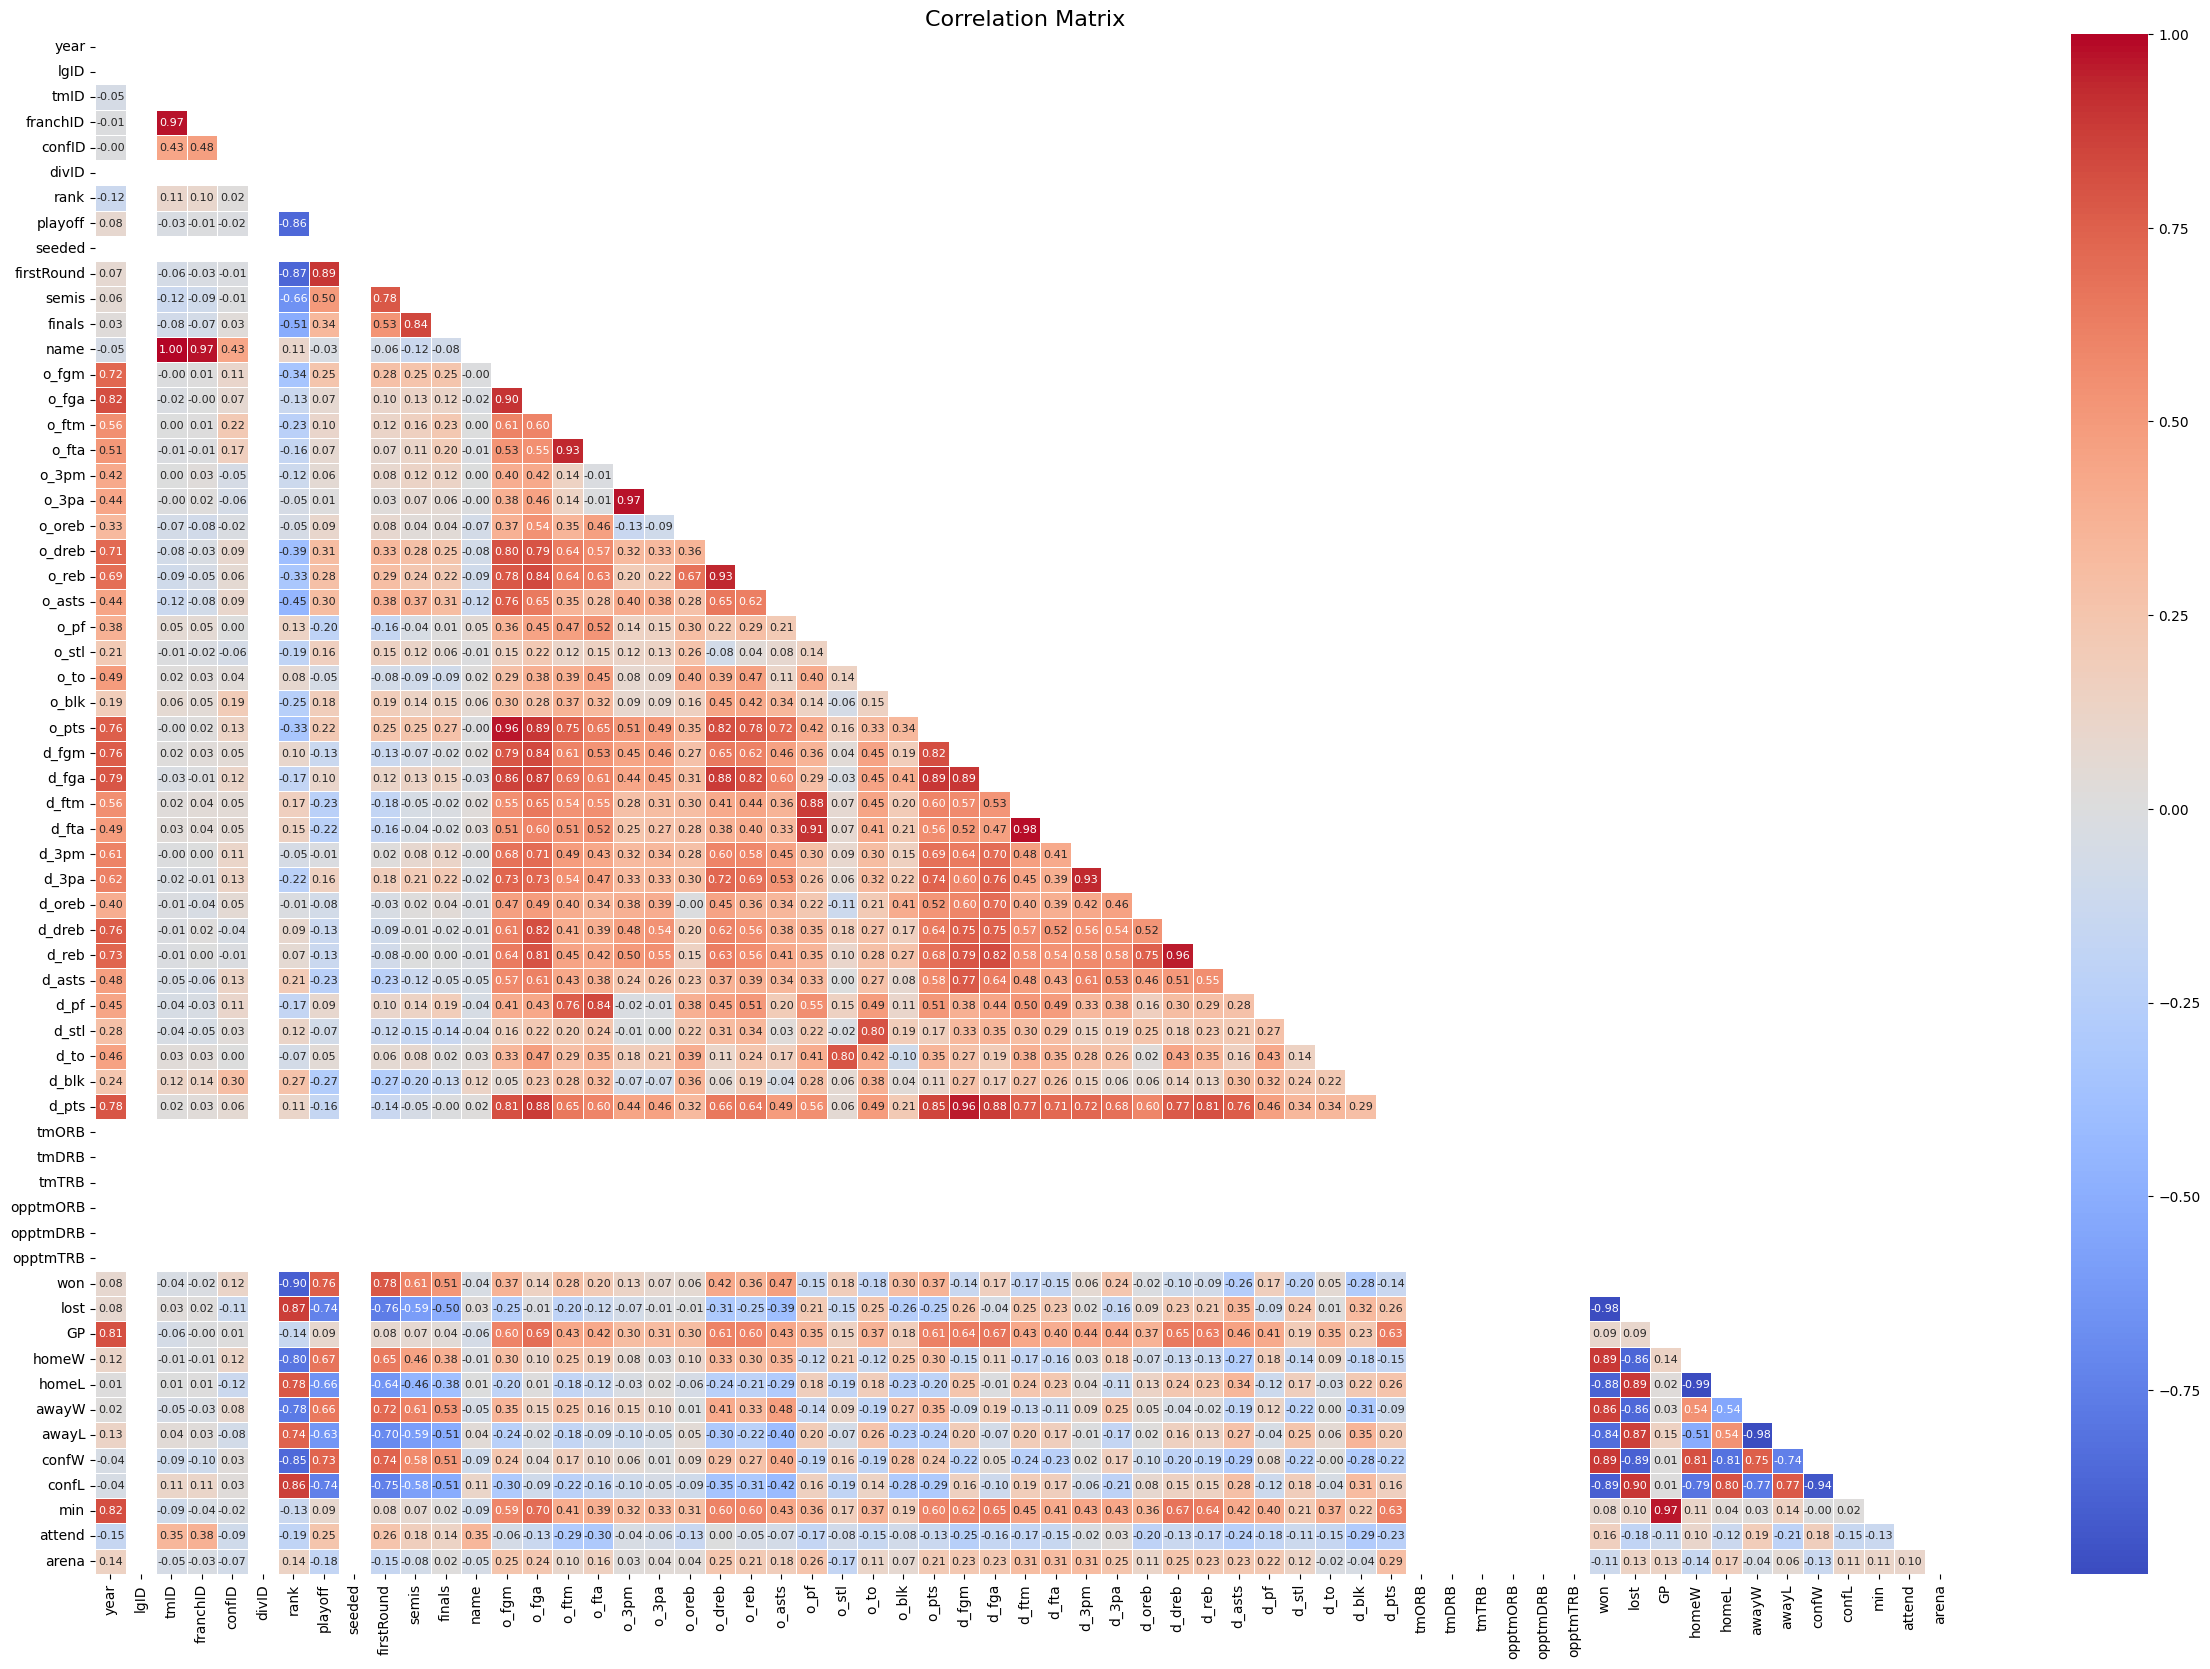

Correlation between target and year: 0.07705063246068848
Correlation between target and lgID: nan
Correlation between target and tmID: -0.02529934329892212
Correlation between target and franchID: -0.0065036191928241486
Correlation between target and confID: -0.016000512024577127
Correlation between target and divID: nan
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and seeded: nan
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and name: -0.02529934329892215
Correlation between target and o_fgm: 0.2515792808650922
Correlation between target and o_fga: 0.07084000425330679
Correlation between target and o_ftm: 0.1047223173119909
Correlation between target and o_fta: 0.0724933405057681
Correlation between target and o_3pm: 0.060612269288855054
Correlation 

{'year': 0.07705063246068848,
 'lgID': nan,
 'tmID': -0.02529934329892212,
 'franchID': -0.0065036191928241486,
 'confID': -0.016000512024577127,
 'divID': nan,
 'rank': -0.8620790896686981,
 'playoff': 1.0,
 'seeded': nan,
 'firstRound': 0.892828570971414,
 'semis': 0.4970630193302927,
 'finals': 0.336817912482514,
 'name': -0.02529934329892215,
 'o_fgm': 0.2515792808650922,
 'o_fga': 0.07084000425330679,
 'o_ftm': 0.1047223173119909,
 'o_fta': 0.0724933405057681,
 'o_3pm': 0.060612269288855054,
 'o_3pa': 0.007957559282677005,
 'o_oreb': 0.0923630258772151,
 'o_dreb': 0.30755716728105326,
 'o_reb': 0.2794116621840806,
 'o_asts': 0.3032475605334074,
 'o_pf': -0.2029192427184587,
 'o_stl': 0.1648824091126278,
 'o_to': -0.051552794336507696,
 'o_blk': 0.17871539023127894,
 'o_pts': 0.2213991839184398,
 'd_fgm': -0.1300557721536696,
 'd_fga': 0.10293846565632093,
 'd_ftm': -0.23395831262583386,
 'd_fta': -0.2196777440462202,
 'd_3pm': -0.00932954576569799,
 'd_3pa': 0.15591906469556485,
 

In [14]:
correlation_matrix(teams_numeric)

In [15]:
def chi_square(dataset, target): 
    for feature in dataset.columns:
        if feature != target:
            contingency_table = pd.crosstab(dataset[feature], dataset[target])

            # check if any category has no data
            if contingency_table.shape[0] == 0 or contingency_table.shape[1] == 0:
                print(f"No data for {feature} and {target}")
                continue
            
            chi2, p, observed, expected = chi2_contingency(contingency_table)
            
            # Step 4: Print or store the results
            print(f"Chi-square test for {feature} and {target}:")
            print(f"Chi-square value: {chi2}")
            print(f"P-value: {p}")
            print("")

In [16]:
chi_square(teams, 'playoff')

Chi-square test for year and playoff:
Chi-square value: 1.3666430343849703
P-value: 0.9980204687073957

Chi-square test for lgID and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for tmID and playoff:
Chi-square value: 32.49763248847927
P-value: 0.027449727442441722

Chi-square test for franchID and playoff:
Chi-square value: 29.671265360983107
P-value: 0.028815606896854487

Chi-square test for confID and playoff:
Chi-square value: 0.00046010944700461995
P-value: 0.9828865593186417

No data for divID and playoff
Chi-square test for rank and playoff:
Chi-square value: 142.0
P-value: 1.9364424317003396e-27

Chi-square test for seeded and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for firstRound and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for semis and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for finals and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for name and playoff:
Chi-square value: 32.497632

The p-value indicates the probability of observing a relationship as extreme as the one in our sample data, assuming that there is no actual relationship in the population.

### Players metrics

In [17]:
print(players['playerID'].nunique()) 

print(players.head())

players.isnull().sum()

893
     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     NaN  1981-05-24  0000-00-00  


playerID          0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64

In [18]:
# Dropped columns: 'collegeOther', 'deathDate', 'firstseason', 'lastseason'

# Count the rows where 'firstseason' is not equal to 0
non_zero_firstseason_count = len(players[players['firstseason'] != 0])

# Count the rows where 'firstseason' is not equal to 0
non_zero_lastseason_count = len(players[players['lastseason'] != 0])

# Count the rows where 'deathDate' is not equal to "0000-00-00"
players['deathDate'] = players['deathDate'].str.strip()
non_empty_deathDate_count = len(players[players['deathDate'] != "0000-00-00"])

# Count the rows where 'collegeOther' is not equal to ""
non_nan_collegeOther_count = players['collegeOther'].notna().sum()

print("Number of rows with 'firstseason' different from 0:", non_zero_firstseason_count)
print("Number of rows with 'lastseason' different from 0:", non_zero_lastseason_count)
print("Number of rows with 'collegeOther' different from "":", non_nan_collegeOther_count)
print("Number of rows with 'deathDate' different from '0000-00-00':", non_empty_deathDate_count)

Number of rows with 'firstseason' different from 0: 0
Number of rows with 'lastseason' different from 0: 0
Number of rows with 'collegeOther' different from : 11
Number of rows with 'deathDate' different from '0000-00-00': 4


#### Players heights comparison

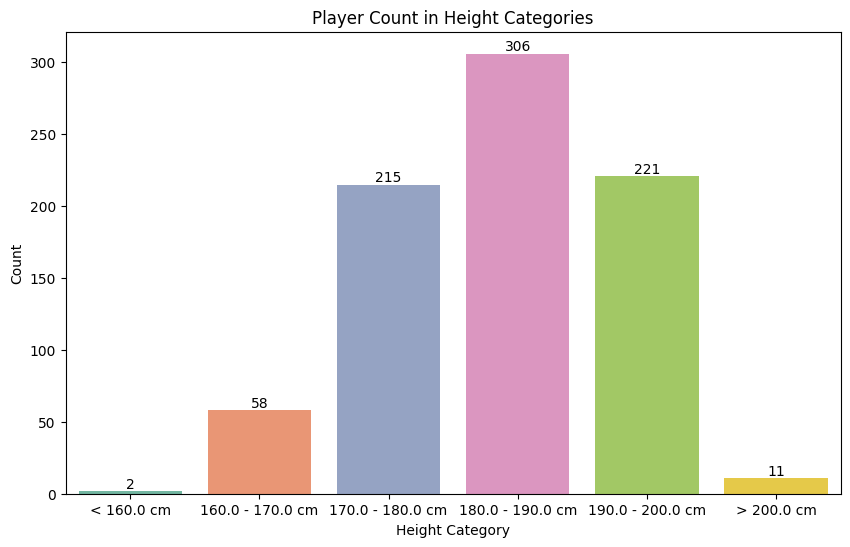

In [19]:
# Convert height from inches to centimeters
players['height_cm'] = players['height'] * 2.54  # 1 inch = 2.54 cm

# Define height categories in centimeters
height_categories = ['< 160.0 cm', '160.0 - 170.0 cm', '170.0 - 180.0 cm', '180.0 - 190.0 cm', '190.0 - 200.0 cm', '> 200.0 cm']

# Define the height ranges for each category
height_ranges = [(0, 160.0), (160.0, 170.0), (170.0, 180.0), (180.0, 190.0), (190.0, 200.0), (200.0, float('inf'))]

# Create a new column in the dataset to store the height category for each player
players['height_category'] = pd.cut(players['height_cm'], bins=[r[0] for r in height_ranges] + [float('inf')], labels=height_categories)

# Count the number of players in each height category
height_category_counts = players['height_category'].value_counts().reindex(height_categories, fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=height_category_counts.index, y=height_category_counts.values, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Player Count in Height Categories')
plt.xlabel('Height Category')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Number of players in each position

Number of rows with empty 'pos': 78


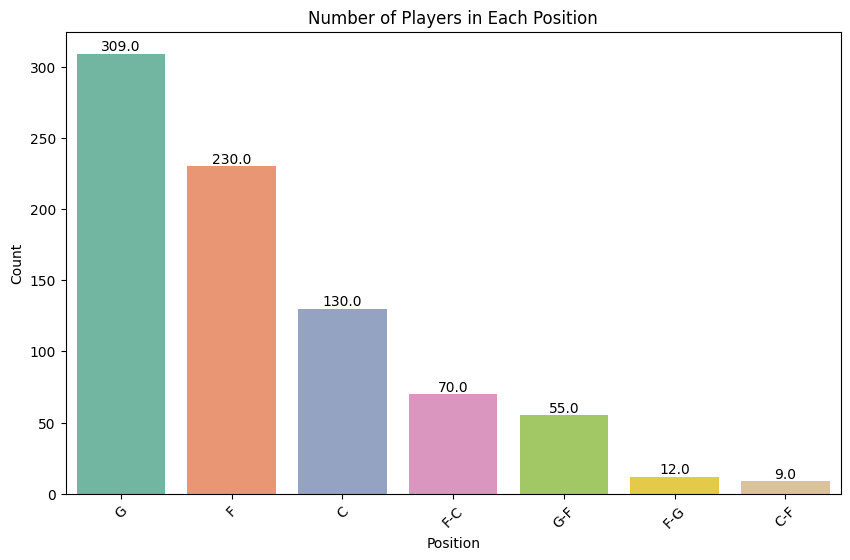

In [20]:
# Create a countplot for player positions
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=players, x='pos', order=players['pos'].value_counts().index, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

empty_pos_count = players['pos'].isnull().sum()
print("Number of rows with empty 'pos':", empty_pos_count)

# Show the plot
plt.show()

#### Top 10 Colleges

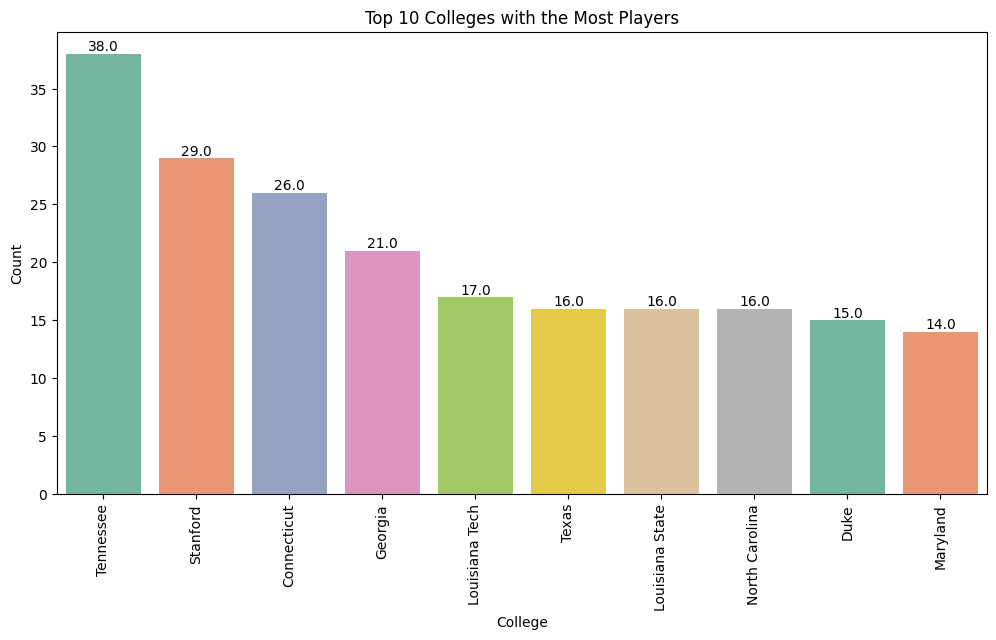

In [21]:
# Get the top 10 colleges with the most players
top_10_colleges = players['college'].value_counts().iloc[:10]

# Create a countplot for the top 10 colleges
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=players, x='college', order=top_10_colleges.index, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Top 10 Colleges with the Most Players')
plt.xlabel('College')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Correlation Matrix between numeric columns

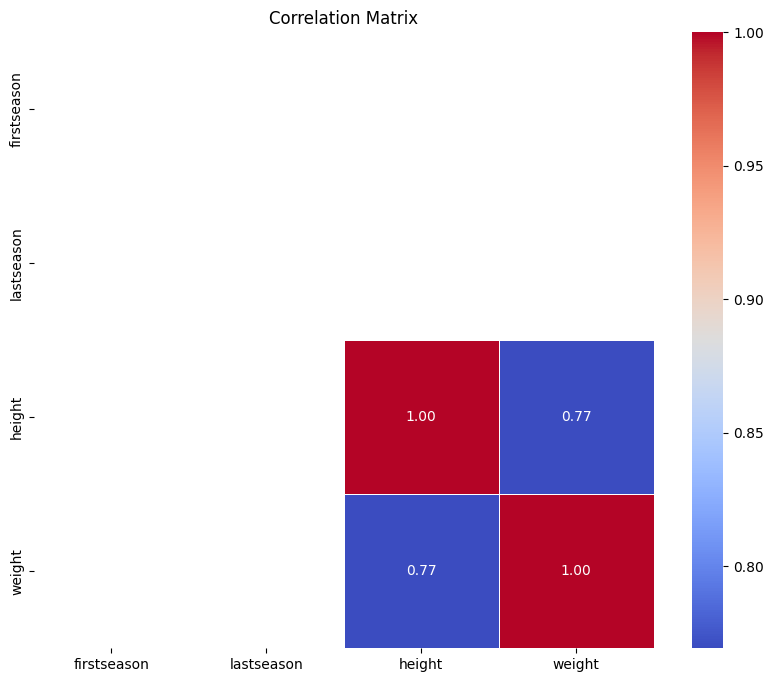

In [22]:
# Select the columns for correlation analysis
numeric_columns = ["firstseason", "lastseason", "height", "weight"]

# Create a subset of the dataset with only the numeric columns
subset = players[numeric_columns]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Teams Post metrics

In [23]:
print(teams_post.head())

teams_post.isnull().sum()

   year tmID  lgID  W  L
0     1  HOU  WNBA  6  0
1     1  ORL  WNBA  1  2
2     1  CLE  WNBA  3  3
3     1  WAS  WNBA  0  2
4     1  NYL  WNBA  4  3


year    0
tmID    0
lgID    0
W       0
L       0
dtype: int64

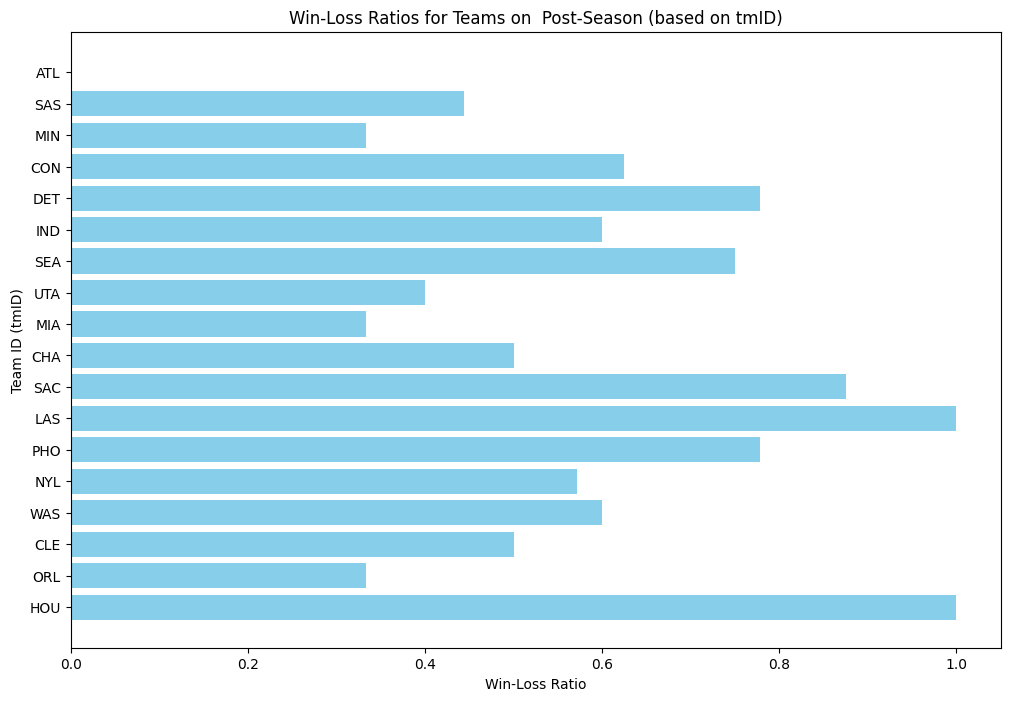

In [24]:
# Calculate win-loss ratios
teams_post['Win-Loss Ratio'] = teams_post['W'] / (teams_post['W'] + teams_post['L'])

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(teams_post['tmID'], teams_post['Win-Loss Ratio'], color='skyblue')

# Add labels and title
plt.xlabel('Win-Loss Ratio')
plt.ylabel('Team ID (tmID)')
plt.title('Win-Loss Ratios for Teams on  Post-Season (based on tmID)')

# Show the chart
plt.show()

### Series Post metrics

<Figure size 1200x800 with 0 Axes>

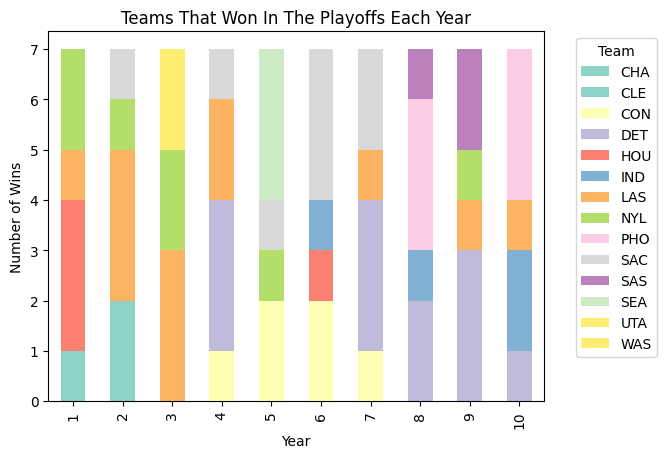

In [25]:
# Group the data by year and count the number of wins for each team in each year
team_wins_by_year = series_post.groupby(['year', 'tmIDWinner'])['W'].count().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
team_wins_by_year.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Teams That Won In The Playoffs Each Year')

# Show the chart
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Teams that won and lost each year

In [26]:
# Filter for the "F" (Finals) round
finals_data = series_post[series_post['round'] == 'F']

# Create a DataFrame with the winning and losing teams for each year
finals_results = finals_data[['year', 'tmIDWinner', 'tmIDLoser']]

# Convert the DataFrame to a prettily formatted table
table = tabulate(finals_results, headers='keys', tablefmt='fancy_grid', showindex=False)

# Display the formatted table
print(table)

╒════════╤══════════════╤═════════════╕
│   year │ tmIDWinner   │ tmIDLoser   │
╞════════╪══════════════╪═════════════╡
│      1 │ HOU          │ NYL         │
├────────┼──────────────┼─────────────┤
│      2 │ LAS          │ CHA         │
├────────┼──────────────┼─────────────┤
│      3 │ LAS          │ NYL         │
├────────┼──────────────┼─────────────┤
│      4 │ DET          │ LAS         │
├────────┼──────────────┼─────────────┤
│      5 │ SEA          │ CON         │
├────────┼──────────────┼─────────────┤
│      6 │ SAC          │ CON         │
├────────┼──────────────┼─────────────┤
│      7 │ DET          │ SAC         │
├────────┼──────────────┼─────────────┤
│      8 │ PHO          │ DET         │
├────────┼──────────────┼─────────────┤
│      9 │ DET          │ SAS         │
├────────┼──────────────┼─────────────┤
│     10 │ PHO          │ IND         │
╘════════╧══════════════╧═════════════╛


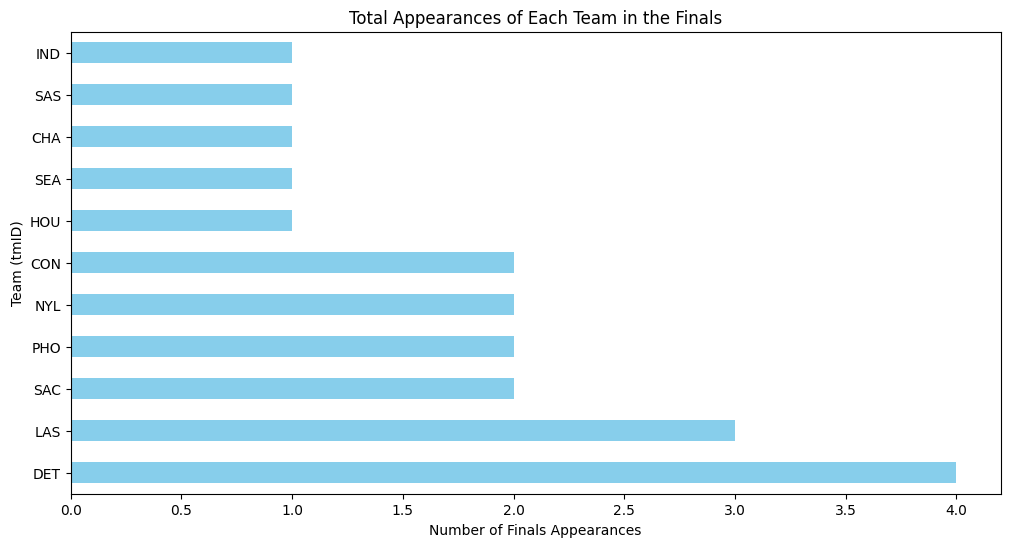

In [27]:
# Filter for the "F" (Finals) round
finals_data = series_post[series_post['round'] == 'F']

# Count how many times each team has appeared in the Finals as either a winner or a loser
team_appearances = pd.concat([finals_data['tmIDWinner'], finals_data['tmIDLoser']]).value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
team_appearances.plot(kind='barh', color='skyblue')

# Add labels and title
plt.ylabel('Team (tmID)')
plt.xlabel('Number of Finals Appearances')
plt.title('Total Appearances of Each Team in the Finals')

# Show the chart
plt.show()

### Coaches metrics

In [28]:
print(coaches['coachID'].nunique()) 

print(coaches.head())

coaches.isnull().sum()

57
      coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0  adamsmi01w     5  WAS  WNBA      0   17    17          1            2
1  adubari99w     1  NYL  WNBA      0   20    12          4            3
2  adubari99w     2  NYL  WNBA      0   21    11          3            3
3  adubari99w     3  NYL  WNBA      0   18    14          4            4
4  adubari99w     4  NYL  WNBA      0   16    18          0            0


coachID        0
year           0
tmID           0
lgID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64

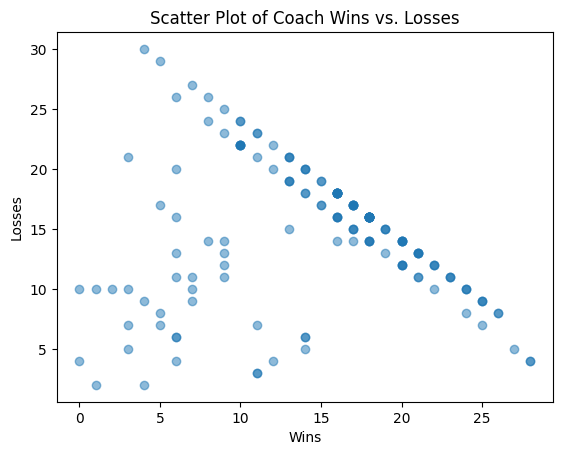

In [29]:
# Extract the wins and losses data from the "won" and "lost" columns
coach_wins = coaches['won']
coach_losses = coaches['lost']

# Create a scatter plot
import matplotlib.pyplot as plt

plt.scatter(coach_wins, coach_losses, alpha=0.5)
plt.xlabel('Wins')
plt.ylabel('Losses')
plt.title('Scatter Plot of Coach Wins vs. Losses')
plt.show()

### Awards Players

In [34]:
print(awards_players.isna().sum())
print(awards_players.head())

playerID    0
award       0
year        0
lgID        0
dtype: int64
     playerID                               award  year  lgID
0  thompti01w  All-Star Game Most Valuable Player     1  WNBA
1  leslili01w  All-Star Game Most Valuable Player     2  WNBA
2  leslili01w  All-Star Game Most Valuable Player     3  WNBA
3  teaslni01w  All-Star Game Most Valuable Player     4  WNBA
4  swoopsh01w  All-Star Game Most Valuable Player     6  WNBA


### Awards Coaches

In [33]:
print(awards_coaches.isna().sum())
print(awards_coaches.head())

coachID    0
award      0
year       0
lgID       0
dtype: int64
      coachID              award  year  lgID
0  coopemi01w  Coach of the Year     1  WNBA
1  hugheda99w  Coach of the Year     2  WNBA
2  stanlma99w  Coach of the Year     3  WNBA
3  laimbbi01w  Coach of the Year     4  WNBA
4  mcconsu01w  Coach of the Year     5  WNBA


## Section: Feature Selection
This section focuses on identify and select relevant features for your prediction model. Use techniques such as correlation analysis, recursive feature elimination, or feature importance from tree-based models.


### Teams dataset

In [30]:
original_teams = teams.copy()

In [31]:
# to delete: lgID, divID, seeded, tmORB, tmDRB, tmTRB, opptmORB, opptmDRB, opptmTRB, rank, firstRound, semis, finals
print(teams.isna().sum())
   
feature_selection_result = teams.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
feature_selection_result = feature_selection_result.drop(columns=['rank', 'firstRound', 'semis', 'finals'])
feature_selection_result = feature_selection_result.drop(columns=['min', 'o_oreb', 'o_dreb', 'd_oreb', 'd_dreb', 'name', 'franchID'])

feature_selection_result.head()

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64


,year,tmID,confID,playoff,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,arena
0,9,ATL,EA,N,895,2258,542,725,202,598,...,30,34,1,16,3,14,2,18,141379,Philips Arena
1,10,ATL,EA,Y,1089,2428,569,755,114,374,...,16,34,12,5,6,11,10,12,120737,Philips Arena
2,1,CHA,EA,N,812,1903,431,577,131,386,...,24,32,5,11,3,13,5,16,90963,Charlotte Coliseum
3,2,CHA,EA,Y,746,1780,410,528,153,428,...,14,32,11,5,7,9,15,6,105525,Charlotte Coliseum
4,3,CHA,EA,Y,770,1790,490,663,211,527,...,14,32,11,5,7,9,12,9,106670,Charlotte Coliseum


In [32]:
feature_selection_result.to_csv('filtered/feature_selection_dataset.csv', index=False)

## Section: Feature Engineering

Create new features that might enhance the predictive power of your model. This could involve transforming existing features, creating interaction terms, or incorporating external data.

The feauture enginnering is done inside the `players.ipynb` file and the creation of the new dataset is done inside `create_final_team.csv` file.

### Shifting target variable

In [ ]:
def shift_target_variable(dataset):
    dataset.sort_values(by=['tmID', 'year'], inplace=True)

    dataset['playoffs'] = dataset.groupby('tmID')['playoff'].shift(-1)

    dataset.drop(columns=['playoff'], inplace=True)

    dataset.dropna(subset=['playoffs'], inplace=True)

    dataset.rename(columns={'playoffs': 'playoff'}, inplace=True)

    dataset.reset_index(drop=True, inplace=True)

    return dataset

#### Original dataset

In [ ]:
original_teams = shift_target_variable(original_teams)
original_teams.to_csv('filtered/original_teams.csv', index=False)

In [ ]:
original_teams_numeric = original_teams.copy()

for column in original_teams_numeric.columns:
    if original_teams_numeric[column].dtype == 'object':
        original_teams_numeric[column] = original_teams_numeric[column].astype('category').cat.codes

correlation_matrix(original_teams_numeric)

#### Feature Selection dataset

In [ ]:
feature_selection_result = shift_target_variable(feature_selection_result)

In [ ]:
feature_teams_numeric = feature_selection_result.copy()

for column in feature_teams_numeric.columns:
    if feature_teams_numeric[column].dtype == 'object':
        feature_teams_numeric[column] = feature_teams_numeric[column].astype('category').cat.codes

correlation_matrix(feature_teams_numeric)

#### Feature engineering dataset

In [ ]:
# TODO: verificar se pode ficar assim ou se adicionamos o código cá
feature_engineering_result = pd.read_csv('filtered/feature_engineering_dataset.csv', delimiter=",")

In [ ]:
eng1_teams_numeric = shift_target_variable(feature_engineering_result.copy())
eng1_teams_numeric.to_csv('filtered/eng1_teams_numeric.csv', index=False)

In [ ]:
eng1_teams_numeric = eng1_teams_numeric.copy()

for column in eng1_teams_numeric.columns:
    if eng1_teams_numeric[column].dtype == 'object':
        eng1_teams_numeric[column] = eng1_teams_numeric[column].astype('category').cat.codes

correlation_matrix(eng1_teams_numeric)

In [ ]:
feature_engineering_result2 = pd.read_csv('filtered/team2_before_shift.csv', delimiter=",")
feature_engineering_result2.drop(columns=['playoff'], inplace=True)
copy_fe1 = feature_engineering_result.copy()
copy_fe1.drop(columns=['powerRanking2'], inplace=True)

feature_engineering_result2 = pd.merge(feature_engineering_result2, copy_fe1, on=['tmID', 'year'])
#feature_engineering_result2.to_csv('text.csv', index=False)
feature_engineering_result2 = shift_target_variable(feature_engineering_result2)
feature_engineering_result = shift_target_variable(feature_engineering_result)

feature_engineering_result2.to_csv('text.csv', index=False)

feature_engineering_result2.head()

In [ ]:
eng2_teams_numeric = feature_engineering_result2.copy()

for column in eng2_teams_numeric.columns:
    if eng2_teams_numeric[column].dtype == 'object':
        eng2_teams_numeric[column] = eng2_teams_numeric[column].astype('category').cat.codes

correlation_matrix(eng2_teams_numeric)

In [ ]:
continuous = ['year', 'average_powerRanking', 'average_PER', 'average_postPowerRanking', 'average_postPER']

In [ ]:
eng2_teams_numeric.head()

## Section: Classification
This section focuses on models creation. The models created are ``Decision Tree``, ``Random Forest``, ``Logistic Regression``, ``Support Vector Machines``, ``K-Nearest Neighbors``, ``Gradient Boosting``. The process involves:

1. **Encoding**: Apply label enconding to non numerical values in ``Original``, ``Feature Selection``, ``Feature Engineering`` datasets
1. **Models**
   - Define the model

### Encoding

#### Original

In [ ]:
#tmID, confID, playoff, arena
# name, franchID, lgID, divID

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the columns 'teamID', 'franchID', 'confID', 'name', 'arena'
original_teams['tmID'] = label_encoder.fit_transform(original_teams['tmID'])
original_teams['confID'] = label_encoder.fit_transform(original_teams['confID'])
original_teams['arena'] = label_encoder.fit_transform(original_teams['arena'])
original_teams['name'] = label_encoder.fit_transform(original_teams['name'])
original_teams['franchID'] = label_encoder.fit_transform(original_teams['franchID'])
original_teams['lgID'] = label_encoder.fit_transform(original_teams['lgID'])
original_teams['divID'] = label_encoder.fit_transform(original_teams['divID'])
original_teams['firstRound'] = label_encoder.fit_transform(original_teams['firstRound'])
original_teams['semis'] = label_encoder.fit_transform(original_teams['semis'])
original_teams['finals'] = label_encoder.fit_transform(original_teams['finals'])

#### After Feature Selection

In [ ]:
feature_selection_result['tmID'] = label_encoder.fit_transform(feature_selection_result['tmID'])
feature_selection_result['confID'] = label_encoder.fit_transform(feature_selection_result['confID'])
feature_selection_result['arena'] = label_encoder.fit_transform(feature_selection_result['arena'])

#### After feature engineering

In [ ]:
# Apply label encoding to the columns 'teamID'
feature_engineering_result['tmID'] = label_encoder.fit_transform(feature_engineering_result['tmID'])

In [ ]:
feature_engineering_result2['tmID'] = label_encoder.fit_transform(feature_engineering_result2['tmID'])
feature_engineering_result2['confID'] = label_encoder.fit_transform(feature_engineering_result2['confID'])
feature_engineering_result2.to_csv('text.csv', index=False)
""" feature_engineering_result2['arena'] = label_encoder.fit_transform(feature_engineering_result2['arena'])
feature_engineering_result2['firstRound'] = label_encoder.fit_transform(feature_engineering_result2['firstRound'])
feature_engineering_result2['semis'] = label_encoder.fit_transform(feature_engineering_result2['semis'])
feature_engineering_result2['finals'] = label_encoder.fit_transform(feature_engineering_result2['finals']) """

### Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    plt.legend(loc="best")
    return plt

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def decision_tree_model(dataset, year):
    X = dataset.copy()
    y = dataset['playoff'].copy()
    X.drop(columns=['playoff'], inplace=True)

    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 3, 4, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    class_weights = {'N': 1, 'Y': 14}

    dt_classifier = DecisionTreeClassifier(class_weight=class_weights)

    grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = DecisionTreeClassifier(**best_params)

    min_features_to_select = 5 
    step_value = 1 
    rfe = RFECV(estimator=best_model, step=step_value, cv=5, min_features_to_select=min_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    num_features_selected = rfe.n_features_
    print(f"Number of features selected: {num_features_selected}")

    selected_features = X_train.columns[rfe.support_]
    print("Selected Features:", selected_features)

    best_model.fit(X_train_rfe, y_train)

    X_test_rfe = rfe.transform(X_test)
    y_pred = best_model.predict(X_test_rfe)

    title = "Learning Curves (Decision Tree)"
    scoring = "accuracy"

    plot_learning_curve(
        best_model,
        title,
        X_train_rfe,
        y_train,
        cv=5,
        scoring=scoring,
    )

    plt.show()

    y_test_binary = y_test.map({'N': 0, 'Y': 1})

    y_scores = best_model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred, zero_division=1))

##### Original dataset

In [ ]:
decision_tree_model(original_teams, 9)

##### Feature Selection dataset

In [ ]:
decision_tree_model(feature_selection_result, 9)

##### Feature engineering dataset

In [ ]:
decision_tree_model(feature_engineering_result, 9)

In [ ]:
decision_tree_model(feature_engineering_result2, 9)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def random_forest_model(dataset, year):
    X = dataset.copy()
    y = dataset['playoff'].copy()
    X.drop(columns=['playoff'], inplace=True)

    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 15, 20],
        'min_samples_split': [2, 5, 8, 12],
        'min_samples_leaf': [1, 2, 4, 6], 
        'max_features': ['auto', 'sqrt', 'log2', None, 0.8, 0.9]
    }

    class_weights = {'N': 1, 'Y': 8}

    rf_classifier = RandomForestClassifier(class_weight=class_weights)

    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = RandomForestClassifier(**best_params)

    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    title = "Learning Curves (Random Forest)"
    scoring = "accuracy"

    plot_learning_curve(
        best_model,
        title,
        X_train,
        y_train,
        cv=5,
        scoring=scoring,
    )

    plt.show()

    y_test_binary = y_test.map({'N': 0, 'Y': 1})

    y_scores = best_model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred, zero_division=1))

##### Original dataset

In [ ]:
random_forest_model(original_teams, 9)

##### Feature Selection dataset

In [ ]:
random_forest_model(feature_selection_result, 9)

##### Feature engineering dataset

In [ ]:
random_forest_model(feature_engineering_result, 9)

In [ ]:
random_forest_model(feature_engineering_result2, 9)

In [ ]:
for i in range(4, 10): 
    print("Year: ", i)
    random_forest_model(feature_engineering_result2, i)

In [ ]:
#for i in range(1, 8): 
    

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def logistic_regression_model(dataset, year):
    X = dataset.copy()
    y = dataset['playoff'].copy()
    X.drop(columns=['playoff'], inplace=True)

    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'lbfgs', 'saga'],
        'max_iter': [1000, 10000]
    }

    lr_classifier = LogisticRegression()

    grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = LogisticRegression(**best_params)

    # Remove RFECV step
    X_train_rfe = X_train

    best_model.fit(X_train_rfe, y_train)

    X_test_rfe = X_test
    y_pred = best_model.predict(X_test_rfe)

    title = "Learning Curves (Logistic Regression)"
    scoring = "accuracy"

    plot_learning_curve(
        best_model,
        title,
        X_train_rfe,
        y_train,
        cv=5,
        scoring=scoring,
    )

    plt.show()

    y_test_binary = y_test.map({'N': 0, 'Y': 1})

    y_scores = best_model.predict_proba(X_test_rfe)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred, zero_division=1))

##### Original dataset

In [ ]:
logistic_regression_model(original_teams, 9)

##### Feature Selection dataset

In [ ]:
logistic_regression_model(feature_selection_result, 9)

##### Feature Engineering dataset

In [ ]:
logistic_regression_model(feature_engineering_result, 9)

In [ ]:
logistic_regression_model(feature_engineering_result2, 9)

In [ ]:
for i in range(4, 10):
    print("Year: ", i)
    logistic_regression_model(feature_engineering_result2, i)

#### Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def svm_model(dataset, year):
    X = dataset.copy()
    y = dataset['playoff'].copy()
    X.drop(columns=['playoff'], inplace=True)

    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['auto', 'scale'],
    }

    # Enable probability estimates
    svc = SVC(probability=True)

    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_

    best_model = SVC(**best_params, class_weight={'Y': 5, 'N': 5}, probability=True)

    best_model.fit(X_train_scaled, y_train)

    y_pred = best_model.predict(X_test_scaled)

    title = "Learning Curves (SVM)"
    plot_learning_curve(
        best_model,
        title,
        X_train_scaled,
        y_train,
        cv=5,
        scoring="accuracy",
    )

    plt.show()

    y_test_binary = y_test.map({'N': 0, 'Y': 1})

    # Use predict_proba for obtaining probability estimates
    y_scores = best_model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred, zero_division=1))

##### Original dataset

In [ ]:
svm_model(original_teams, 9)

##### Feature Selection

In [ ]:
svm_model(feature_selection_result, 9)

##### Feature engineering dataset

In [ ]:
svm_model(feature_engineering_result, 9)

In [ ]:
svm_model(feature_engineering_result2, 9)

#### KNN dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def knn_model(dataset, year):
    X = dataset.copy()
    y = dataset['playoff'].copy()
    X.drop(columns=['playoff'], inplace=True)

    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    scaler = StandardScaler()
    #scaler = RobustScaler()
    #scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    k_best_selector = SelectKBest(f_classif, k='all')
    X_train_selected = k_best_selector.fit_transform(X_train_scaled, y_train)

    selected_features = X_train.columns[k_best_selector.get_support()]
    print("Selected Features:", selected_features)

    param_grid = {
        'n_neighbors': [1, 3, 5, 7, 10],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }

    knn_classifier = KNeighborsClassifier()
    
    grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)

    best_params = grid_search.best_params_

    best_model = KNeighborsClassifier(**best_params)

    best_model.fit(X_train_selected, y_train)

    X_test_selected = k_best_selector.transform(X_test_scaled)
    y_pred = best_model.predict(X_test_selected)

    title = "Learning Curves (KNN)"
    scoring = "accuracy"

    plot_learning_curve(
        best_model,
        title,
        X_train_selected,
        y_train,
        cv=5,
        scoring=scoring,
    )

    plt.show()

    y_test_binary = y_test.map({'N': 0, 'Y': 1})

    y_scores = best_model.predict_proba(X_test_selected)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred))

##### Original dataset

In [ ]:
knn_model(original_teams, 9)

##### Feature Selection dataset

In [ ]:
knn_model(feature_selection_result, 9)

##### Feature engineering dataset

In [ ]:
knn_model(feature_engineering_result, 9)

In [ ]:
knn_model(feature_engineering_result2, 9)

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def gradient_boosting_model(dataset, year):
    X = dataset.copy()
    y = dataset['playoff'].copy()
    X.drop(columns=['playoff'], inplace=True)

    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    gb_classifier = GradientBoostingClassifier()

    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0],
    }

    grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = GradientBoostingClassifier(**best_params)

    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    title = "Learning Curves (Gradient Boosting)"
    scoring = "accuracy"

    # Assuming you have a plot_learning_curve function defined
    plot_learning_curve(best_model, title, X_train, y_train, cv=5, scoring=scoring)
    plt.show()

    y_test_binary = y_test.map({'N': 0, 'Y': 1})

    y_scores = best_model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred))

##### Original dataset

In [ ]:
gradient_boosting_model(original_teams, 9)

##### Feature Selection dataset

In [ ]:
gradient_boosting_model(feature_selection_result, 9)

##### Feature Engineering dataset

In [ ]:
gradient_boosting_model(feature_engineering_result, 9)

In [ ]:
gradient_boosting_model(feature_engineering_result2, 9)

## Section: Model Evaluation

### Decision Tree

In [ ]:
for i in range(1, 9): 
    print("Training year 9 based on previous ", i, " years.")
    filtered_feature_engineering_result2 = feature_engineering_result2[feature_engineering_result2['year'] >= 9 - i]
    decision_tree_model(filtered_feature_engineering_result2, 9)

### Random Forest

In [ ]:
for i in range(1, 9): 
    print("Training year 9 based on previous ", i, " years.")
    filtered_feature_engineering_result2 = feature_engineering_result2[feature_engineering_result2['year'] >= 9 - i]
    random_forest_model(filtered_feature_engineering_result2, 9)

### Logistic Regression

In [ ]:
for i in range(1, 9): 
    print("Training year 9 based on previous ", i, " years.")
    filtered_feature_engineering_result2 = feature_engineering_result2[feature_engineering_result2['year'] >= 9 - i]
    logistic_regression_model(filtered_feature_engineering_result2, 9)

### SVM

In [ ]:
for i in range(1, 9): 
    print("Training year 9 based on previous ", i, " years.")
    filtered_feature_engineering_result2 = feature_engineering_result2[feature_engineering_result2['year'] >= 9 - i]
    svm_model(filtered_feature_engineering_result2, 9)

### KNN

In [ ]:
for i in range(1, 9): 
    print("Training year 9 based on previous ", i, " years.")
    filtered_feature_engineering_result2 = feature_engineering_result2[feature_engineering_result2['year'] >= 9 - i]
    knn_model(filtered_feature_engineering_result2, 9)

### Gradient Boosting

In [ ]:
for i in range(1, 9): 
    print("Training year 9 based on previous ", i, " years.")
    filtered_feature_engineering_result2 = feature_engineering_result2[feature_engineering_result2['year'] >= 9 - i]
    gradient_boosting_model(filtered_feature_engineering_result2, 9)

## Section: Testing for Final Dataset (Year 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

def final_decision_tree(dataset_train, dataset_predict):
    X_train = dataset_train.drop(columns=['playoff'])
    y_train = dataset_train['playoff']

    X_test = dataset_predict

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 3, 4, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    class_weights = {'N': 1, 'Y': 14}

    dt_classifier = DecisionTreeClassifier(class_weight=class_weights)
    
    grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = DecisionTreeClassifier(**best_params)

    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    
    results_df = pd.DataFrame({'Team ID': dataset_predict['tmID'], 'Predicted Playoffs': y_pred})
    print(results_df)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def final_knn(dataset_train, dataset_predict):
    # Extracting features and target variable for training set
    X_train = dataset_train.drop(columns=['playoff'])
    y_train = dataset_train['playoff']

    # Extracting features for prediction set
    X_test = dataset_predict

    scaler = StandardScaler()
    #scaler = RobustScaler()
    #scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    k_best_selector = SelectKBest(f_classif, k='all')
    X_train_selected = k_best_selector.fit_transform(X_train_scaled, y_train)

    selected_features = X_train.columns[k_best_selector.get_support()]
    print("Selected Features:", selected_features)

    param_grid = {
        'n_neighbors': [1, 3, 5, 7, 10],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }

    knn_classifier = KNeighborsClassifier()
    
    grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)

    best_params = grid_search.best_params_

    best_model = KNeighborsClassifier(**best_params)

    best_model.fit(X_train_selected, y_train)

    X_test_selected = k_best_selector.transform(X_test_scaled)
    y_pred = best_model.predict(X_test_selected)

    results_df = pd.DataFrame({'Team ID': dataset_predict['tmID'], 'Predicted Playoffs': y_pred})
    print(results_df)    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

def final_random_forest(dataset_train, dataset_predict):
    X_train = dataset_train.drop(columns=['playoff'])
    y_train = dataset_train['playoff']

    X_test = dataset_predict

    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 15, 20],
        'min_samples_split': [2, 5, 8, 12],
        'min_samples_leaf': [1, 2, 4, 6], 
        'max_features': ['auto', 'sqrt', 'log2', None, 0.8, 0.9]
    }

    class_weights = {'N': 1, 'Y': 8}

    rf_classifier = RandomForestClassifier(class_weight=class_weights)
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = RandomForestClassifier(**best_params)

    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    results_df = pd.DataFrame({'Team ID': dataset_predict['tmID'], 'Predicted Playoffs': y_pred})
    print(results_df)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd

def final_logistic_regression(dataset_train, dataset_predict):
    X_train = dataset_train.drop(columns=['playoff'])
    y_train = dataset_train['playoff']

    X_test = dataset_predict

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'lbfgs', 'saga'],
        'max_iter': [1000, 10000]
    }

    lr_classifier = LogisticRegression()
    grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = LogisticRegression(**best_params)

    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    
    results_df = pd.DataFrame({'Team ID': dataset_predict['tmID'], 'Predicted Playoffs': y_pred})
    print(results_df)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def final_svm(dataset_train, dataset_predict):
    X_train = dataset_train.drop(columns=['playoff'])
    y_train = dataset_train['playoff']

    X_test = dataset_predict

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['auto', 'scale'],
    }

    svc = SVC()

    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_

    best_model = SVC(**best_params, class_weight={'Y': 5, 'N': 5})

    best_model.fit(X_train_scaled, y_train)

    y_pred = best_model.predict(X_test_scaled)

    results_df = pd.DataFrame({'Team ID': dataset_predict['tmID'], 'Predicted Playoffs': y_pred})
    print(results_df)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def final_gradient_boosting(dataset_train, dataset_predict):
    X_train = dataset_train.drop(columns=['playoff'])
    y_train = dataset_train['playoff']

    X_test = dataset_predict

    gb_classifier = GradientBoostingClassifier()

    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0],
    }

    grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = GradientBoostingClassifier(**best_params)

    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    results_df = pd.DataFrame({'Team ID': dataset_predict['tmID'], 'Predicted Playoffs': y_pred})
    print(results_df)

In [ ]:
selected_features = feature_engineering_result2.columns.to_list()
selected_features.remove('playoff')
print(selected_features)

feature_engineering_dataset = pd.read_csv('filtered/feature_engineering_dataset.csv', delimiter=",")
feature_engineering_dataset.drop(columns=['playoff', 'powerRanking2'], inplace=True)

testing_data = pd.read_csv('filtered/team2_before_shift.csv', delimiter=",")
#testing_data.to_csv('filtered/testing_data1.csv', index=False)
testing_data = pd.merge(testing_data, feature_engineering_dataset, on=['tmID', 'year'])
testing_data['tmID'] = label_encoder.fit_transform(testing_data['tmID'])
testing_data['confID'] = label_encoder.fit_transform(testing_data['confID'])
training_data = testing_data.copy()
testing_data.drop(columns=['playoff'], inplace=True)
testing_data = testing_data[selected_features]
testing_data = testing_data[testing_data['year'] == 10]

testing_data.to_csv('filtered/testing_data.csv', index=False)

training_data = shift_target_variable(training_data)

training_data.to_csv('filtered/training_data.csv', index=False)

final_decision_tree(training_data, testing_data)

In [ ]:
final_random_forest(training_data, testing_data)

In [ ]:
final_logistic_regression(training_data, testing_data)

In [ ]:
final_svm(training_data, testing_data)

In [ ]:
final_gradient_boosting(training_data, testing_data)

In [ ]:
final_knn(training_data, testing_data)